In [1]:
# version 2.0
# ugvc/reports/methyldackel_qc_report.ipynb
# =============================================


In [2]:
import pandas as pd  
import numpy as np  
import seaborn as sns  
import os  
import matplotlib.pyplot as plt  
import json
# from IPython.display import display, HTML
import re
from collections import Counter
from IPython.core.display import display, HTML

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings('ignore')

In [4]:
pd.set_option('display.max_rows', 10000)
pd.set_option('display.width', 1200)
pd.set_option('display.max_colwidth', 0)

# function for wraping long text 
def wrap_df_text(df):
    return HTML(df.to_html().replace("\\n","<br>"))



In [5]:
# input file is aggregated csv
# ------------------------------
in_file_name = 'input_for_html_report.csv'
df_csv = pd.read_csv(in_file_name, sep=",", header=0)

In [6]:
# seperate the processing into the different tables from MethylDackel
list_tables = list(set(df_csv.table))
list_tables = sorted(list_tables)


In [7]:
# function to extract info for generating 2D histogram plots per each table, metric and detail
def get_histogram_data(df_input):
    # initilise variables
    list_output = []
    patterns = ['^PercentMethylation_[0-9]','^Coverage_[0-9]','CumulativeCoverage_[0-9]']
    list_tables = list(set(df_input.table))
    list_tables = sorted(list_tables)

    for tbl in list_tables:
         # create dataframe for each table type (MethylDackel task)
        idx = df_input.table.str.fullmatch(tbl)
        if (idx.any(axis=None)):
            df_tbl = pd.DataFrame()
            df_tbl = df_input.loc[idx, :].copy()

            # create dataframe for table + for metric type (in patterns)
            for pat in patterns:
                # check if pattern exists and divide into tables
                idx = df_tbl.metric.str.contains(pat)
                if (idx.any(axis=None)):
                    df_tbl_pat = pd.DataFrame()
                    df_tbl_pat = df_tbl.loc[idx, :].copy()

                    # check if detail exists: *further* divide 
                    list_details = ()
                    list_details = list(set(df_tbl_pat.detail)) 
                    list_details = sorted(list_details, key=str.lower)

                    # create sub-tables
                    for dtl in list_details:
                        idx = df_tbl_pat.detail.str.fullmatch(dtl)
                        if (idx.any(axis=None)):
                            df_tbl_pat_dtl = pd.DataFrame()
                            df_tbl_pat_dtl = df_tbl_pat.loc[idx, :].copy()

                        list_output.append(df_tbl_pat_dtl)

    list_output = pd.concat(list_output, axis = 0)

    dict_output = {x: y for x, y in list_output.groupby('table')}
    return(dict_output)



In [8]:
# function to extract the 2D info for generating 2D histogram plots per each table, metric and detail
def get_area_data(df_input):
    # initilise variables
    list_output = []
    pat = '^PercentMethylationPosition_'
    list_tables = list(set(df_input.table))
    list_tables = sorted(list_tables)

    for tbl in list_tables:
         # create dataframe for each table type (MethylDackel task)
        idx = df_input.table.str.fullmatch(tbl)
        if (idx.any(axis=None)):
            df_tbl = pd.DataFrame()
            df_tbl = df_input.loc[idx, :].copy()

            # create dataframe for table + for metric type (in pat)
            idx = df_tbl.metric.str.contains(pat)
            if (idx.any(axis=None)):
                df_tbl_pat = pd.DataFrame()
                df_tbl_pat = df_tbl.loc[idx, :].copy()

                # check if detail exists: *further* divide 
                list_details = ()
                list_details = list(set(df_tbl_pat.detail)) 
                if(list_details.count('OT')>0):
                    list_details = sorted(list_details, key=str.lower, reverse = True)
                else:
                    list_details = sorted(list_details, key=str.lower)

                # create sub-tables
                for dtl in list_details:
                    idx = df_tbl_pat.detail.str.fullmatch(dtl)
                    if (idx.any(axis=None)):
                        df_tbl_pat_dtl = pd.DataFrame()
                        df_tbl_pat_dtl = df_tbl_pat.loc[idx, :].copy()



                    list_output.append(df_tbl_pat_dtl)

    list_output = pd.concat(list_output, axis = 0)

    dict_output = {x: y for x, y in list_output.groupby('table')}
    return(dict_output)


In [9]:
# get_area_data(df_csv)

In [10]:
# function to extract info for generating tables of descriptibe stats of metrics: mean, std, median for each metric
def get_descriptive_stats(df_input):
    # initilise variables
    list_output = []
    patterns = ['^PercentMethylation_[a-zA-Z]+','^Coverage_[a-zA-Z]+','CumulativeCoverage_[a-zA-Z]+|Total']
    list_tables = list(set(df_input.table))
    list_tables = sorted(list_tables)

    for tbl in list_tables:
         # create dataframe for each table type (MethylDackel task)
        idx = df_input.table.str.fullmatch(tbl)
        if (idx.any(axis=None)):
            df_tbl = pd.DataFrame()
            df_tbl = df_input.loc[idx, :].copy()

            # create dataframe for table + for metric type (in patterns)
            for pat in patterns:
                # check if pattern exists and divide into tables
                idx = df_tbl.metric.str.contains(pat)
                if (idx.any(axis=None)):
                    df_tbl_pat = pd.DataFrame()
                    df_tbl_pat = df_tbl.loc[idx, :].copy()

                    # check if detail exists: *further* divide 
                    list_details = ()
                    list_details = list(set(df_tbl_pat.detail)) 
                    list_details = sorted(list_details, key=str.lower)

                    # create sub-tables
                    for dtl in list_details:
                        idx = df_tbl_pat.detail.str.fullmatch(dtl)
                        if (idx.any(axis=None)):
                            df_tbl_pat_dtl = pd.DataFrame()
                            df_tbl_pat_dtl = df_tbl_pat.loc[idx, :].copy()
                        list_output.append(df_tbl_pat_dtl)
    list_output = pd.concat(list_output, axis = 0)

    dict_output = {x: y for x, y in list_output.groupby('table')}
    return(dict_output)


In [11]:
# get_descriptive_stats(df_csv)

In [12]:
def format_metric_names(df_in):
    df_in['metric']= df_in['metric'].str.replace(r'PercentMethylation', 'Percent Methylation: ', regex=True)
    df_in['metric']= df_in['metric'].str.replace(r'PercentMethylationPosition', 'Percent Methylation Position: ', regex=True)
    df_in['metric']= df_in['metric'].str.replace(r'CumulativeCoverage', 'Cumulative Coverage', regex=True)
    df_in['metric']= df_in['metric'].str.replace(r'Coverage', 'Coverage: ', regex=True)
    df_in['metric']= df_in['metric'].str.replace(r'TotalCpGs', 'Total CpGs: ', regex=True)
    df_in['metric']= df_in['metric'].str.replace(r'_', ' ', regex=True)
    return(df_in)


In [13]:
def parse_metric_names(df_in):
    df_in['metric_orig'] = df_in['metric']
    pat = '\w+_(\d+)' # get value of bins
    df_in['bin']= df_in['metric'].str.extract(pat)
    # get metric name
    pat = '(\w+)_\d+'
    df_in['metric']= df_in['metric'].str.extract(pat)
    return(df_in)


In [14]:
def display_side_by_side(dfs:list, captions:list, tablespacing=2):
    output = ""
    for (caption, df) in zip(captions, dfs):
        output += df.style.set_table_attributes("style='display:inline-table'").set_caption(caption)._repr_html_()
        output += tablespacing * "\xa0"

    display(HTML(output))


In [15]:
HTML("<h1 style=\"font-size:24px;\">"+"QC Report for Methylation Calling"+"</h1>")
HTML("<hr/>")


In [16]:
HTML("<h2 style=\"font-size:18px;\">"+"Human Genome: Global Methylation Statistics"+"</h2>")
HTML("<hr/>")


In [17]:
#  get_descriptive_stats(df_csv)

In [55]:
# main statistics table
# --------------------------
tbl = 'MergeContext'
genome = 'hg'
df_table = get_descriptive_stats(df_csv)[tbl]
df_table = df_table[df_table['detail'] == genome]
cols = ['metric','value']
df_table = pd.concat([df_table.tail(1),df_table.head(df_table.shape[0]-1) ],axis = 0)
df_table = df_table.reset_index()
df_table  = format_metric_names(df_table)
df_table['metric']  = df_table['metric'].str.title()
to_int = df_table.metric == 'Total Cpgs: '
to_float = df_table.metric != 'Total Cpgs: '
df_table.loc[to_int, 'value'] = df_table.loc[to_int, 'value'].map('{:,.0f}'.format)
df_table.loc[to_float, 'value'] = df_table.loc[to_float, 'value'].map('{:,.2f}'.format)
df_table[cols]

# -----------


,metric,value
0,Total Cpgs:,"25,630,457"
1,Percent Methylation: Mean,75.31
2,Percent Methylation: Std,30.78
3,Percent Methylation: Median,90.00
4,Coverage: Mean,71.67
5,Coverage: Std,27.51
6,Coverage: Median,73.00


In [19]:
# per Read information
# ------------------------
HTML(" ")
HTML("<h2 style=\"font-size:12px;\">"+"Human Genome: Details of Per-Read Descriptive Statistics"+"</h2>")

tbl = 'PerRead'
genome = 'hg'
df_table = get_descriptive_stats(df_csv)[tbl]
# df_table = df_table[df_table['detail'] == genome]
cols = ['metric','value']
# df_table = pd.concat([df_table.tail(1),df_table.head(df_table.shape[0]-1) ],axis = 0)
df_table = df_table.reset_index()
df_table  = format_metric_names(df_table)
df_table['metric']  = df_table['metric'].str.title()
df_table['value'] = df_table['value'].map('{:,.2f}'.format) 
df_table[cols]

# -----------


,metric,value
0,Percent Methylation: Mean,65.83
1,Percent Methylation: Std,42.63
2,Percent Methylation: Median,100.00
3,Total Cpgs: Mean,3.00
4,Total Cpgs: Std,3.62
5,Total Cpgs: Median,2.00


In [20]:
# print histogram plots of mergecontext for HG
tbl = 'MergeContext'
genome = 'hg'
df_table = get_histogram_data(df_csv)[tbl]
df_table = df_table[df_table['detail'] == genome]
df_table = parse_metric_names(df_table)
df_table = format_metric_names(df_table)
df_table['stat_type'] =  df_table['metric'].str.extract(r'([A-Za-z]+):')

# -----------


In [21]:
HTML(" ")
HTML("<h2 style=\"font-size:16px;\">"+"Human Genome: Cytosines in Other Contexts Descriptive Statistics"+"</h2>")
HTML("<hr/>")

tbl = 'MergeContextNoCpG'

df_table = get_descriptive_stats(df_csv)[tbl]
df_table = df_table.reset_index()
df_table  = format_metric_names(df_table)

df_table['stat_type']=  df_table['metric'].str.extract(r'([A-Za-z]+)[\s:]')
df_table['metric']  = df_table['metric'].str.title()
df_table['value'][df_table['stat_type'] == "Percent"] = (df_table['value'][df_table['stat_type'] == "Percent"]/100).map('{:,.2%}'.format)
df_table['value'][df_table['stat_type'] == "Coverage"] = df_table['value'][df_table['stat_type'] == "Coverage"].map('{:,.2f}'.format)

table_names = df_table['detail'].unique()
cols = ['metric','value', 'detail']
df_output = []
df_output = [y for x, y in df_table.groupby('detail')]

df_to_print = []
cols = ['metric','value']
for l in df_output:
    l = l.reset_index()
    df_to_print.append(l[cols])

display_side_by_side(df_to_print, table_names)

HTML(" ")

# --------


,metric,value
0,Percent Methylation: Mean,2.29%
1,Percent Methylation: Std,4.30%
2,Percent Methylation: Median,1.00%
3,Coverage: Mean,64.89
4,Coverage: Std,28.31
5,Coverage: Median,65.00
,metric,value
0,Percent Methylation: Mean,3.38%
1,Percent Methylation: Std,8.04%
2,Percent Methylation: Median,0.00%


In [22]:
# function for creating Mbias plots
# -----------------------------------------------------------------------------------
def plot_mbias(in_list_df):

    plt.style.use('ggplot')

    if (len(in_list_df) == 4):
        i = j = k = 0
        in_colours = ['tomato','indianred','tomato','indianred']
        f, ax = plt.subplots(2, 2, figsize = [12, 12])

        for j in range(ax.shape[0]):
            for k in range(0, ax.shape[1]):

                currax = ax[j][k]
                curr_title = in_list_df[i]['detail'].unique()[0]

                sns.lineplot(data = in_list_df[i],
                            x="bin",
                            y="value",
                            lw=2.5,
                            ax = currax,
                            color=in_colours[i]
                            )
                currax.set_xlabel("Position",fontsize=14)
                currax.set_ylabel("Fraction of Methylation",fontsize=14)
                currax.set_title(curr_title,fontsize=14)
                currax.tick_params(labelsize=14)
                plt.xticks(rotation=45)
                currax.set_ylim([0, 1])
                i+=1

        plt.tight_layout()

    else:
        in_colours = ['tomato','indianred']
        f, ax = plt.subplots(1, 2, figsize = [12, 5.5])

        for i in range(len(in_list_df)):

            currax = ax[i]
            curr_title = in_list_df[i]['detail'].unique()[0]

            sns.lineplot(data = in_list_df[i],
                        x="bin",
                        y="value",
                        lw=2.5,
                        ax = currax,
                        color=in_colours[i]
                        )
            currax.set_xlabel("Position",fontsize=14)
            currax.set_ylabel("Fraction of Methylation",fontsize=14)
            currax.set_title(list_tables[i],fontsize=14)
            currax.tick_params(labelsize=14)
            plt.xticks(rotation=45)
            currax.set_ylim([0, 1])

        plt.tight_layout()
        
# --------

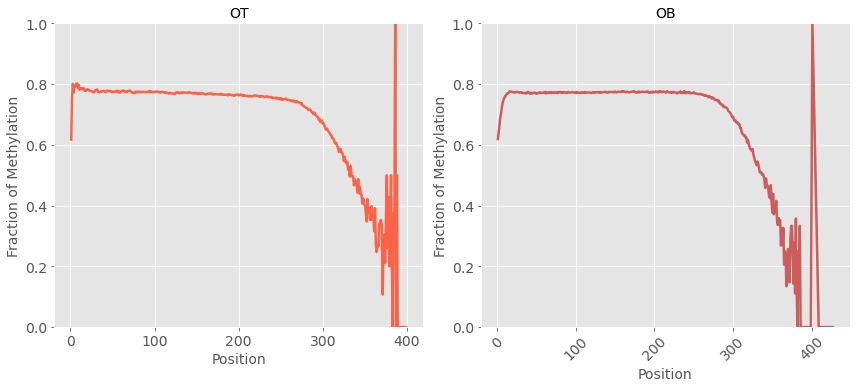

In [23]:
# Mbias: Mean methylation along reads
# ========================================
HTML(" ")
HTML("<h2 style=\"font-size:16px;\">"+"Human Genome: M-bias plots of mean methylation along reads"+"</h2>")
HTML("<hr/>")

tbl = 'Mbias'

df_table = get_area_data(df_csv)[tbl]
df_table = parse_metric_names(df_table)
df_table = df_table.reset_index()
df_table  = format_metric_names(df_table)
df_table['bin'] = df_table['bin'].astype(int)
# df_table['binned'] = np.arange(0,np.max(df_table['bin'])+7,10)


list_tables = list(set(df_table['detail']))

df_to_print = df_table.copy()
df_to_print['stat_type'] =  df_to_print['metric'].str.extract(r'([A-Za-z]+)\s')
df_to_print['metric']  = df_to_print['metric'].str.title()

list_df = [y for x, y in df_to_print.groupby(df_table['detail'], sort = False)]

# plot the MBIAS tests
plot_mbias(list_df)

# ---------------


In [24]:
# CONTINUES Mbias: Mean methylation along reads
HTML("<h2 style=\"font-size:14px;\">"+"M-bias Descriptive Statistics"+"</h2>")
HTML(" ")
tbl = 'Mbias'

df_table = get_descriptive_stats(df_csv)[tbl]
# df_table = df_table.reset_index()
df_table  = format_metric_names(df_table)

df_to_print = df_table.copy()
df_to_print['stat_type'] =  df_to_print['metric'].str.extract(r'([A-Za-z]+)\s')
df_to_print['metric']  = df_to_print['metric'].str.title()


df_to_print['value'][df_to_print['stat_type'] == "Percent"] = (df_to_print['value'][df_to_print['stat_type'] == "Percent"]).map('{:,.2%}'.format)


cols = ['metric','value']
df_output = []
df_output = [y for x, y in df_to_print.groupby('detail')]


if (len(df_output) ==4):
    order =[3,2,1,0]
else:
    order =[1,0]
df_output = [df_output[i] for i in order]

del(df_to_print)
df_to_print = []
temp_tables = []
for l in df_output:
    l = l.reset_index()
    temp_tables.append(l['detail'][0])
    df_to_print.append(l[cols])

display_side_by_side(df_to_print, temp_tables)

# ---------------


,metric,value
0,Percent Methylation: Mean,68.22%
1,Percent Methylation: Std,17.16%
2,Percent Methylation: Median,76.39%
,metric,value
0,Percent Methylation: Mean,66.78%
1,Percent Methylation: Std,20.58%
2,Percent Methylation: Median,77.11%


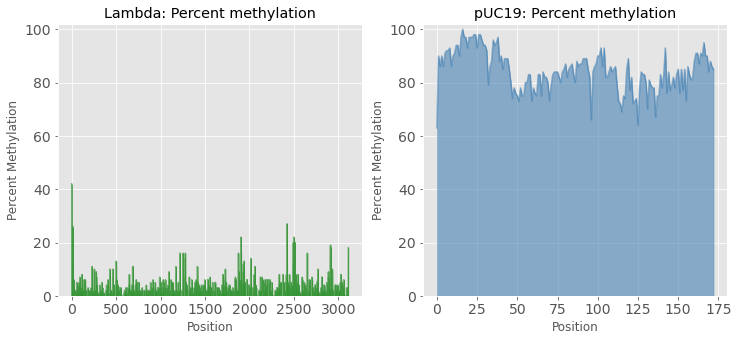

In [25]:
## Control genomes (if exist)
# ------------------------------

tbl = 'MergeContext'
df_table = get_descriptive_stats(df_csv)[tbl]
all_genomes = list(set(df_table['detail']))
ctrl_genomes = ['Lambda', 'pUC19']

check = all(item in all_genomes for item in ctrl_genomes)

if check is True:

    HTML(" ")
    HTML("<h2 style=\"font-size:14px;\">"+"Control Genomes: Methylation and Coverage"+"</h2>")
    HTML("<hr/>")

    # PRINT PLOTS OF PERCENT METHYLATION ACROSS ENTIRE CONTROL GENOMES 
    #-----------------------------------------------------------------
    tbl = 'MergeContext'
    df_table = pd.DataFrame()
    df_table = get_area_data(df_csv)[tbl]
    df_table = parse_metric_names(df_table)
    df_table = df_table.reset_index()
    df_table  = format_metric_names(df_table)
    df_table['bin'] = df_table['bin'].astype(int)
    df_output = [y for x, y in df_table.groupby('detail')]


    df_pos_meth = []
    n = 102
    f, ax = plt.subplots(1, 2, figsize = [12, 5])
    i = 0
    palet = ['forestgreen','steelblue']

    for df_pos_meth in df_output:
        # get methylation per position
        df_pos_meth = df_pos_meth.reset_index()
        temp_genome = df_pos_meth['detail'].unique()[0]

        # print to subplots
        currax = ax[i]
        s = df_pos_meth.plot(kind = 'area', ylim = [0,n],y  ='value' ,
                                     title = temp_genome + ": Percent methylation", 
                      legend=False, color=palet[i], alpha=0.6, ax = currax,
                            fontsize=14)
        a = currax.set(xlabel='Position', ylabel='Percent Methylation')
        plt.style.use('ggplot')

        i+=1

    HTML(" ")

# --------


In [26]:
## Control genomes (if exist)
# ------------------------------
HTML(" ")

tbl = 'MergeContext'
df_table = get_descriptive_stats(df_csv)[tbl]
all_genomes = list(set(df_table['detail']))
ctrl_genomes = ['Lambda', 'pUC19']

check = all(item in all_genomes for item in ctrl_genomes)

if check is True:

    HTML("<h2 style=\"font-size:12px;\">"+"Control Genomes: Methylation and Coverage Descriptive Statistics"+"</h2>")
    # HTML("<hr/>")
    tbl = 'MergeContext'
    genome = 'hg'
    df_to_print = pd.DataFrame()
    df_table = df_table[df_table['detail'] != genome]
    df_table = df_table.reset_index()
    df_table  = format_metric_names(df_table)

    df_table['stat_type']=  df_table['metric'].str.extract(r'([A-Za-z]+)[\s:]')
    df_table['metric']  = df_table['metric'].str.title()
    df_table['value'][df_table['stat_type'] == "Percent"] = (df_table['value'][df_table['stat_type'] == "Percent"]/100).map('{:,.2%}'.format)
    df_table['value'][df_table['stat_type'] == "Coverage"] = df_table['value'][df_table['stat_type'] == "Coverage"].map('{:,.2f}'.format)
    df_table['value'][df_table['stat_type'] == "Total"] = df_table['value'][df_table['stat_type'] == "Total"].map('{:,.0f}'.format)
    df_table['metric']= df_table['metric'].str.replace(r'Cpgs', 'CpGs', regex=True)

    table_names = df_table['detail'].unique()
    cols = ['metric','value', 'detail']
    df_output = []
    df_output = [y for x, y in df_table.groupby('detail')]

    df_to_print = []
    cols = ['metric','value']
    for l in df_output:
        l = l.reset_index()
    #     HTML("<h2 style=\"font-size:12px;\">"+l['detail'][0]+"</h2>")
    #     display(l[cols])
        df_to_print.append(l[cols])

    display_side_by_side(df_to_print, table_names)
    
    #--------


,metric,value
0,Percent Methylation: Mean,1.09%
1,Percent Methylation: Std,2.68%
2,Percent Methylation: Median,0.00%
3,Coverage: Mean,41.17
4,Coverage: Std,12.45
5,Coverage: Median,42.00
6,Total CpGs:,"3,113"
,metric,value
0,Percent Methylation: Mean,84.29%
1,Percent Methylation: Std,7.52%


In [27]:
# function for printing bar plots of methylation and coverage at CpGs 
def plot_bar_distrib (in_table):
    i =0
    in_colours = ['salmon','tomato']
    curr_genome = "Human Genome"
    cols = ['bin','value']
    n_rows = in_table.shape[0]
    if ( n_rows > 10 ):
        h = 5
        w = 13.5
        n = 2

        in_list_df = [y for x, y in in_table.groupby(df_table['metric'], sort = False)]

        f, ax = plt.subplots(1, n, figsize = [w, h])

        for i in range(len(in_list_df)):

            currax = ax[i]
            y_axis_label = in_list_df[i]['metric'].unique()[0]
            y_axis_label = y_axis_label.replace(":", "" )
            x_axis_label ="Value Bins"
            curr_title = curr_genome + ": " + y_axis_label
            
            sns.barplot(data = in_list_df[i],
                        x="bin",
                        y="value",
                        lw=2.5,
                        ax = currax,
                        color=in_colours[i]
                        )
            currax.set_xlabel(x_axis_label,fontsize=14)
            currax.set_ylabel(y_axis_label,fontsize=14)
            currax.set_title(curr_title,fontsize=13)
            currax.tick_params(labelsize=14)
            f.axes[i].tick_params(labelrotation=45)

    else: 
        h = 5
        w = 5.5
        n = 1

        f, ax = plt.subplots(n, n, figsize = [w, h])

        y_axis_label = in_table['metric'].unique()[0]
        y_axis_label = y_axis_label.replace(":", "" )
        curr_title = curr_genome + ": " + y_axis_label

        sns.barplot(data = in_table,
                    x="bin",
                    y="value",
                    lw=2.5,
                    ax = ax,
                    color=in_colours[i]
                    )
        ax.set_xlabel("Value Bins",fontsize=14)
        ax.set_ylabel(y_axis_label,fontsize=14)
        ax.set_title(curr_title,fontsize=13)
        ax.tick_params(labelsize=14)
        plt.xticks(rotation=45)

#--------


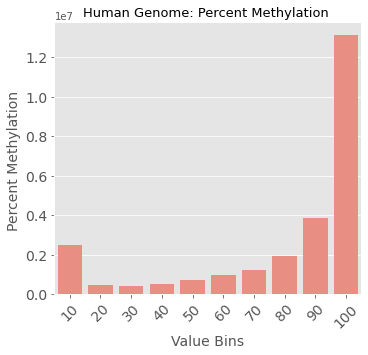

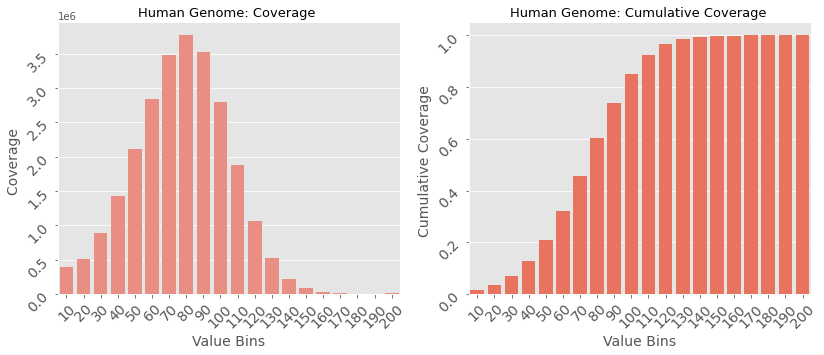

In [28]:
# print details of mergeCOntext plots of CpG Methylation and Coverage
# -----------------------------
# main statistics table
# --------------------------
tbl = 'MergeContext'
genome = 'hg'
df_table = get_histogram_data(df_csv)[tbl]
df_table = df_table[df_table['detail'] == genome]
df_table = parse_metric_names(df_table)
df_table = format_metric_names(df_table)
df_table['stat_type'] =  df_table['metric'].str.extract(r'([A-Za-z]+):')


HTML(" ")
HTML("<hr/>")
HTML("<h2 style=\"font-size:16px;\">"+"Human Genome: Additional Details of CpG Methylation and Coverage"+"</h2>")
HTML("<hr/>")
HTML(" ")

list_df = [y for x, y in df_table.groupby(df_table['stat_type'], sort = False)]

for df_to_plot in list_df:
    plot_bar_distrib(df_to_plot)

#--------


In [29]:
# print details of figures
# --------------------------
HTML(" ")
HTML("<h2 style=\"font-size:12px;\">"+"Human Genome: Values of CpG Methylation and Coverage"+"</h2>")
HTML(" ")

list_df = [y for x, y in df_table.groupby(df_table['metric'], sort = False)]

df_to_print = []
temp_tables = []
cols = ['bin','value']
for i, sub_df in enumerate(list_df):
    sub_df = sub_df.reset_index()
    if(i<2):
        sub_df['value'] = sub_df['value'].map('{:,.0f}'.format) 
    else:
        sub_df['value'] = sub_df['value'].map('{:,.2%}'.format) 
    temp_tables.append(sub_df['metric'][0].replace(":", "" ))
    df_to_print.append(sub_df[cols])
    

display_side_by_side(df_to_print, temp_tables)
#-------


,bin,value
0,10,"2,485,719"
1,20,"476,103"
2,30,"408,225"
3,40,"500,593"
4,50,"688,984"
5,60,"944,741"
6,70,"1,241,455"
7,80,"1,908,668"
8,90,"3,870,855"
9,100,"13,105,114"
